### Residual Plot Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv("data/Reynolds.csv")
df

,ScalesSold,MonthsEmployed
0,275,41
1,296,106
2,317,76
3,376,104
4,162,22
5,150,12
6,367,85
7,308,111
8,189,40
9,235,51


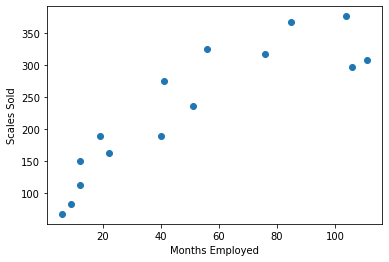

In [4]:
plt.scatter(df['MonthsEmployed'],df['ScalesSold'])
plt.ylabel("Scales Sold")
plt.xlabel("Months Employed")
plt.show()

In [5]:
x = df['MonthsEmployed']
y = df['ScalesSold']
z = sm.add_constant(x)
model = sm.OLS(y,z)
Model = model.fit()
print(Model.summary())

/home/prem/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:             ScalesSold   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     46.41
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           1.24e-05
Time:                        13:30:50   Log-Likelihood:                -78.745
No. Observations:                  15   AIC:                             161.5
Df Residuals:                      13   BIC:                             162.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            111.2279     21.628      5.

/home/prem/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


### Linear Regression Equation: ScalesSold = 111.2279 + 2.3768 * MonthsEmployed

In [6]:
E = Model.resid_pearson

In [7]:
E

array([ 1.33945744, -1.35645713,  0.50765989,  0.35518943, -0.03063607,
        0.20702037,  1.08543558, -1.35411191, -0.34936157,  0.05163116,
       -1.00208207, -0.56041143, -1.18121025,  1.62923113,  0.65864542])

In [8]:
y_hat = Model.predict(z)
y_hat

0     208.675693
1     363.166061
2     291.862814
3     358.412511
4     163.516970
5     139.749221
6     313.253788
7     375.049935
8     206.298918
9     232.443442
10    132.618896
11    139.749221
12    125.488571
13    244.327316
14    156.386645
dtype: float64

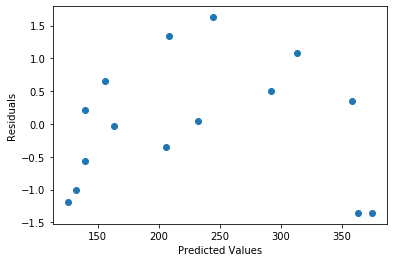

In [10]:
plt.scatter(y_hat,E)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

##### There is a curvillinear relationship among predicted value and residuals, but not rectangular shape.

In [11]:
x_sq = (x**2)
x_sq

0      1681
1     11236
2      5776
3     10816
4       484
5       144
6      7225
7     12321
8      1600
9      2601
10       81
11      144
12       36
13     3136
14      361
Name: MonthsEmployed, dtype: int64

In [24]:
x_new = np.column_stack((x,x_sq))
z_new = sm.add_constant(x_new)
model2 = sm.OLS(y,z_new)
Model2 = model2.fit()
print(Model2.summary())

                            OLS Regression Results                            
Dep. Variable:             ScalesSold   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     55.36
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           8.75e-07
Time:                        13:51:18   Log-Likelihood:                -72.704
No. Observations:                  15   AIC:                             151.4
Df Residuals:                      12   BIC:                             153.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.3476     22.775      1.991      0.0

### Residual Plot

In [25]:
E_new = Model2.resid_pearson
E_new

array([ 0.797777  , -0.99895952, -0.32984543,  1.27097898, -0.18118441,
        0.97178443,  0.91436152, -0.48542046, -1.59531168, -1.28395183,
       -0.48348828, -0.13117488, -0.44045635,  0.94303218,  1.03185873])

In [29]:
y_hat2 = Model2.predict(z_new)
y_hat2

array([247.5143749 , 330.41691942, 328.36408757, 332.21125762,
       168.24230429, 116.51933758, 335.49771571, 324.72407789,
       243.96290147, 279.23569304,  99.65750913, 116.51933758,
        82.17493987, 292.50993204, 153.44961189])

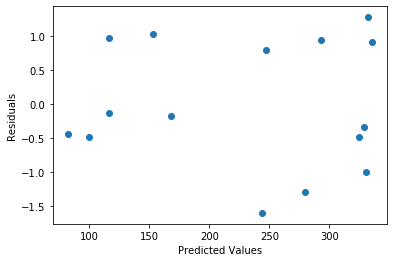

In [30]:
plt.scatter(y_hat2,E_new)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

#### Note: There is no curvillinear relationship.

### Interaction Effect

In [32]:
tbl = pd.read_csv("data/tyler.csv")
tbl

,price,AdvertisingExpenditure($1000s),Sales(1000s)
0,2.0,50,478
1,2.5,50,373
2,3.0,50,335
3,2.0,50,473
4,2.5,50,358
5,3.0,50,329
6,2.0,50,456
7,2.5,50,360
8,3.0,50,322
9,2.0,50,437


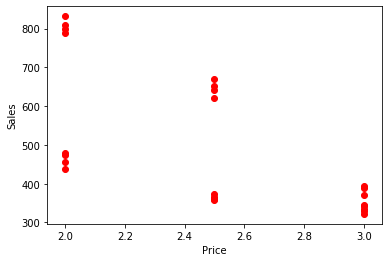

In [35]:
plt.scatter(tbl['price'],tbl['Sales(1000s)'],color= 'red')
plt.xlabel("Price")
plt.ylabel("Sales")
plt.show()

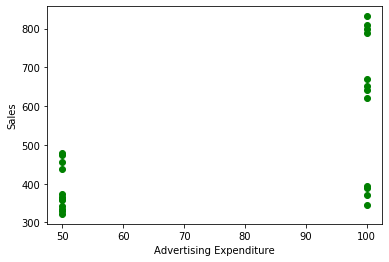

In [37]:
plt.scatter(tbl['AdvertisingExpenditure($1000s)'],tbl['Sales(1000s)'],color= 'green')
plt.xlabel("Advertising Expenditure")
plt.ylabel("Sales")
plt.show()

In [42]:
z1 = tbl['AdvertisingExpenditure($1000s)']
z2 = tbl['price']
z3 = z1 * z2

In [43]:
x_new2 = np.column_stack((z1,z2,z3))
y = tbl['Sales(1000s)']
z = sm.add_constant(x_new2)
model3 = sm.OLS(y,z)
Model3 = model3.fit()
print(Model3.summary())

                            OLS Regression Results                            
Dep. Variable:           Sales(1000s)   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     297.9
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           9.26e-17
Time:                        15:48:27   Log-Likelihood:                -111.99
No. Observations:                  24   AIC:                             232.0
Df Residuals:                      20   BIC:                             236.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -275.8333    112.842     -2.444      0.0

### Transformation of Dependent variable

In [45]:
tbl1 = pd.read_csv("data/MPG.csv")
tbl1

,Miles-per-Gallon,Weight
0,28.7,2289
1,29.2,2113
2,34.2,2180
3,27.9,2448
4,33.3,2026
5,26.4,2702
6,23.9,2657
7,30.5,2106
8,18.1,3226
9,19.5,3213


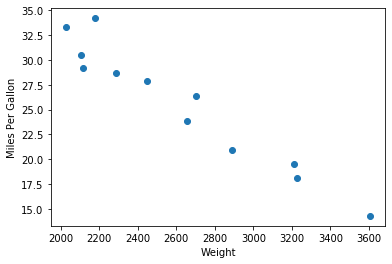

In [48]:
plt.scatter(tbl1["Weight"],tbl1["Miles-per-Gallon"])
plt.xlabel("Weight")
plt.ylabel("Miles Per Gallon")
plt.show()

In [49]:
x = tbl1["Weight"]
y = tbl1["Miles-per-Gallon"]
z = sm.add_constant(x)
model4 = sm.OLS(y,z)
Model4 = model4.fit()
print(Model4.summary())

                            OLS Regression Results                            
Dep. Variable:       Miles-per-Gallon   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     144.8
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           2.85e-07
Time:                        16:01:08   Log-Likelihood:                -22.091
No. Observations:                  12   AIC:                             48.18
Df Residuals:                      10   BIC:                             49.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.0957      2.582     21.725      0.0

In [50]:
E = Model4.resid_pearson
E

array([-0.44511273, -1.37252481,  2.08753315,  0.18422536,  0.47540179,
        1.05668329, -0.75350063, -0.64311699, -0.25953343,  0.4879158 ,
        0.12130227, -0.93927307])

In [51]:
y_hat = Model4.predict(z)
y_hat

0     29.443573
1     31.492839
2     30.712721
3     27.592247
4     32.505829
5     24.634783
6     25.158743
7     31.574344
8     18.533557
9     18.684924
10    14.097361
11    22.469081
dtype: float64

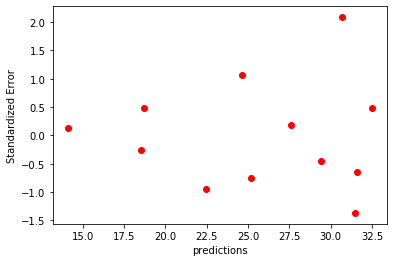

In [52]:
plt.scatter(y_hat,E,color = 'red')
plt.xlabel("predictions")
plt.ylabel("Standardized Error")
plt.show()

#### Note: There is some conical relationship present between predicted values and Residual Error

In [53]:
logy = np.log(y)

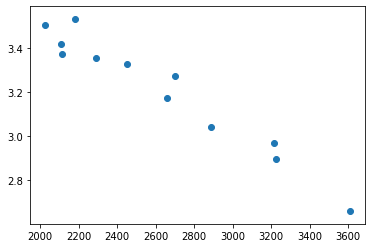

In [54]:
plt.scatter(x,logy)
plt.show()

In [55]:
Model4 = sm.OLS(logy,z).fit()
print(Model4.summary())

                            OLS Regression Results                            
Dep. Variable:       Miles-per-Gallon   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     181.2
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           9.84e-08
Time:                        16:22:35   Log-Likelihood:                 17.005
No. Observations:                  12   AIC:                            -30.01
Df Residuals:                      10   BIC:                            -29.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5242      0.099     45.553      0.0

In [56]:
E_log = Model4.resid_pearson
E_log

array([-0.31630114, -1.42005514,  1.5623004 ,  0.48370101, -0.0537228 ,
        1.60448776, -0.29474869, -0.79674991, -0.18335787,  0.87474775,
       -0.87956572, -0.58073564])

In [57]:
logy_hat = Model4.predict(z)
logy_hat

0     3.377221
1     3.465414
2     3.431840
3     3.297547
4     3.509009
5     3.170268
6     3.192817
7     3.468922
8     2.907694
9     2.914208
10    2.716776
11    3.077064
dtype: float64

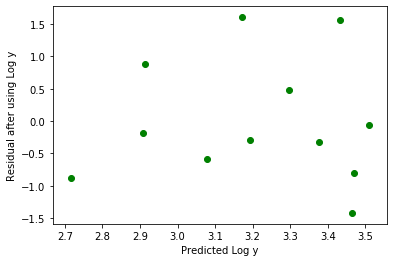

In [58]:
plt.scatter(logy_hat,E_log,color = 'green')
plt.xlabel("Predicted Log y")
plt.ylabel("Residual after using Log y")
plt.show()

#### Note: Clearly see that conical shape is not present.